# This Notebook is used to create a visual representation of the camera trajectories
Code adapted from [NeRF From Nothing](https://colab.research.google.com/drive/1TppdSsLz8uKoNwqJqDGg8se8BHQcvg_K?usp=sharing#scrollTo=ptTYjWao3VsM)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [57]:
matrixB=[[1, 1, 1, 1],
[1, 1, 1 ,1],
[1, 1, 1, 1],
[1, 1, 1, 1]]
matrixResult=[]#np.array([])

for i in range(0,869,10):
    Templine=[]
    matrixTemp=[]
   
    filename=str(i)+".txt"
    # This is just to change the camera view to the correct orientation
    with open(filename) as fh:
        for line in fh:
            lineString =line.split()
            #print(lineString)
            #print(lineString[1])
            temp=[]
            for part in lineString:
                temp.append(float(part))
            Templine.append(temp)
        matrixTemp.append(Templine)
        #print(matrixTemp)
    #np.append(matrixResult,np.array(matrixTemp))
    matrixResult.append(matrixTemp[0])
   # print(matrixResult)


#data = np.load('tiny_nerf_data.npz')

poses = np.array(matrixResult)

print(f'Poses shape: {poses.shape}')

print(poses[0])

Poses shape: (87, 4, 4)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


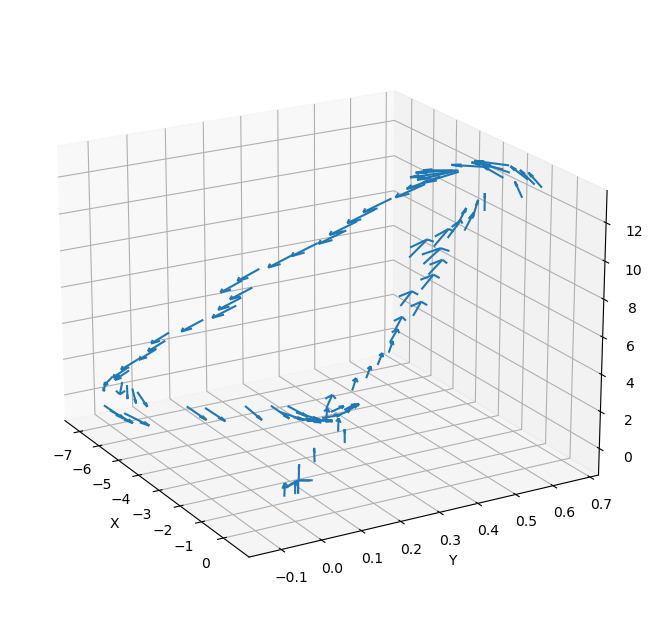

In [59]:
dirs = np.stack([np.sum([0, 0, 1] * pose[:3, :3], axis=-1) for pose in poses])
origins = poses[:, :3, -1]

ax = plt.figure(figsize=(12, 8)).add_subplot(projection='3d')
_ = ax.quiver(
  origins[..., 0].flatten(),
  origins[..., 1].flatten(),
  origins[..., 2].flatten(),
  dirs[..., 0].flatten(),
  dirs[..., 1].flatten(),
  dirs[..., 2].flatten(), length=0.7, normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(20, -30) 
plt.show()

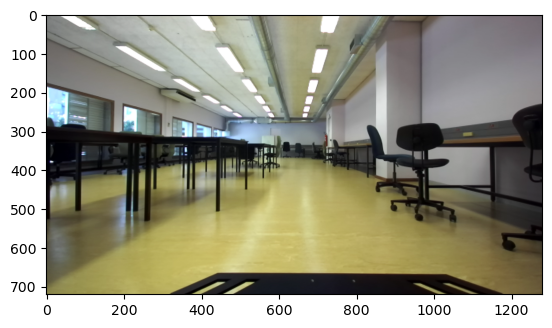

In [64]:

"C:\\Users\\adams\\Documents\\PythonStuff\\NerfStuff\\cropped-images\\Crop-2.png"
img_data = PIL.Image.open("C:\\Users\\adams\\Documents\\PythonStuff\\NerfStuff\\nerf\images\\2.png")
temp=np.array(img_data)
#image_list.append(temp)
#image_data=np.array(image_list)
imgplot = plt.imshow(temp)